# ML Group Project

## Data Load and Exploratory Analysis

In [1]:
#Need to download vecstack and gplearn in environment
# @misc{vecstack2016,
#        author = {Igor Ivanov},
#        title = {Vecstack},
#        year = {2016},
#        publisher = {GitHub},
#        howpublished = {\url{https://github.com/vecxoz/vecstack}},
# }

import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
from dateutil.parser import parse
from sklearn.exceptions import ConvergenceWarning
import statistics as stat
import numpy as np
import pandas as pd
import Helper_Function as hf #File with custom-built functions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from vecstack import StackingTransformer
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

#Set needed file paths
file_path_1 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Labels.csv'
file_path_2 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Train.csv'
file_path_3 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/test.csv'

#Load labels, train data and test data
labels = hf.read_data(file_path_1)
raw_df = hf.read_data(file_path_2)
raw_test_df = hf.read_data(file_path_3)

#External Data
pop_df = pd.read_excel('External_features.xls', sheet_name = 0)
weather_df = pd.read_excel('External_features.xls', sheet_name = 1)

raw_df.describe(include = 'all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400.000000,59400.000000,59400,59400,59400.000000,59400,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1898,NaN,2146,NaN,NaN,37400,NaN,...,7,8,6,5,5,10,7,3,7,6
top,NaN,NaN,3/15/11,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Parse date 
raw_df['date_recorded'] = pd.to_datetime(raw_df['date_recorded'])
raw_df['Year'], raw_df['Month'], raw_df['Day'], raw_df['Day_of_Week'] = raw_df['date_recorded'].dt.year, raw_df['date_recorded'].dt.month,raw_df['date_recorded'].dt.day,raw_df['date_recorded'].dt.weekday

raw_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Year,Month,Day,Day_of_Week
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,3,14,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3,6,2
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013,2,25,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,1,28,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,7,13,2


In [3]:
raw_df.describe(include = 'all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Year,Month,Day,Day_of_Week
count,59400.000000,59400.000000,59400,59400,59400.000000,59400,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400.000000,59400.000000,59400.000000,59400.000000
unique,NaN,NaN,356,1898,NaN,2146,NaN,NaN,37400,NaN,...,5,10,7,3,7,6,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-03-15 00:00:00,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,NaN,NaN,NaN,NaN
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,33186,17021,17021,45794,28522,34625,NaN,NaN,NaN,NaN
first,NaN,NaN,2002-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2013-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,2011.921667,4.375640,15.621498,2.939933
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,0.958758,3.029247,8.687553,1.951627
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,1.000000,1.000000,0.000000
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,2.000000,8.000000,1.000000


In [4]:
pop_df.head()

,Name,Abbr.,Status,Capital,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016
0,Tanzania,TZA,Rep,Dodoma,885803,34443603,44928923,0.304420,50.721123,50144200
1,Arusha,ARU,Reg,Arusha,37576,1288088,1694310,0.315368,45.090217,1890700
2,Dar es Salaam,DAR,Reg,Dar es Salaam,1393,2487288,4364541,0.754739,3133.195262,5465400
3,Dodoma,DOD,Reg,Dodoma,41311,1692025,2083588,0.231417,50.436639,2264500
4,Geita,GEI,Reg,Geita,20054,1337718,1739530,0.300371,86.742296,1932200


In [5]:
weather_df.head()

,Month_num,Month,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,1,January,18.6,29.4,10,133.7
1,2,February,18.6,29.4,9,144.5
2,3,March,18.3,29.0,7,113.9
3,4,April,17.9,28.7,5,57.8
4,5,May,16.5,28.0,1,5.3


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 44 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null 

In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [8]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
Name                    27 non-null object
Abbr.                   27 non-null object
Status                  27 non-null object
Capital                 27 non-null object
Area_KM2                27 non-null int64
Population2002          27 non-null int64
Population2012          27 non-null int64
Increase 2002 - 2012    27 non-null float64
Pop_Density2012         27 non-null float64
Population2016          27 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 2.2+ KB


In [9]:
pop_df.describe(include = 'all')

,Name,Abbr.,Status,Capital,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016
count,27,27,27,27,27.000000,2.700000e+01,2.700000e+01,27.000000,27.000000,2.700000e+01
unique,27,27,3,25,NaN,NaN,NaN,NaN,NaN,NaN
top,Pwani,SIN,Reg,Dodoma,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,25,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,65615.037037,2.551378e+06,3.328068e+06,0.281288,192.399592,3.714389e+06
std,NaN,NaN,NaN,NaN,165171.390975,6.391986e+06,8.350869e+06,0.127120,597.003756,9.329334e+06
min,NaN,NaN,NaN,NaN,1393.000000,4.086090e+05,5.646040e+05,0.082708,12.316035,6.426000e+05
25%,NaN,NaN,NaN,NaN,20700.500000,1.009680e+06,1.287212e+06,0.230012,31.711156,1.401050e+06
50%,NaN,NaN,NaN,NaN,32547.000000,1.317879e+06,1.640087e+06,0.271129,50.436639,1.759000e+06
75%,NaN,NaN,NaN,NaN,47591.500000,1.701245e+06,2.173211e+06,0.333781,80.670861,2.389850e+06


In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
Month_num        12 non-null int64
Month            12 non-null object
Temp_Min         12 non-null float64
Temp_max         12 non-null float64
rainy_days       12 non-null int64
total_rain_mm    12 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 656.0+ bytes


In [11]:
weather_df.describe(include = 'all')

,Month_num,Month,Temp_Min,Temp_max,rainy_days,total_rain_mm
count,12.000000,12,12.000000,12.000000,12.000000,12.000000
unique,NaN,12,NaN,NaN,NaN,NaN
top,NaN,December,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN
mean,6.500000,NaN,16.783333,28.783333,3.416667,50.575000
std,3.605551,NaN,1.937587,1.314834,3.918681,60.526375
min,1.000000,NaN,13.600000,26.500000,0.000000,0.000000
25%,3.750000,NaN,15.075000,27.825000,0.000000,0.075000
50%,6.500000,NaN,17.400000,29.000000,1.500000,15.750000
75%,9.250000,NaN,18.375000,29.575000,7.000000,116.250000


In [12]:
#Merge with target variable
initial_df = pd.merge(labels, raw_df, how = 'inner', on ='id') 
initial_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Year,Month,Day,Day_of_Week
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,3,14,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3,6,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013,2,25,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,1,28,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,7,13,2


In [13]:
#Merge with population data set
drop_col_pop = ['Abbr.', 'Capital', 'Population2016']
pop_df = pop_df.drop(drop_col_pop, axis = 1)

combined_df = pd.merge(initial_df, pop_df, how = 'left', left_on = 'region', right_on = 'Name')
combined_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,Month,Day,Day_of_Week,Name,Status,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,3,14,0,Iringa,Reg,35503,840404,941238,0.119983,26.511506
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,3,6,2,Mara,Reg,21760,1363397,1743830,0.279033,80.139246
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,2,25,0,Manyara,Reg,44522,1037605,1425131,0.373481,32.009591
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,1,28,0,Mtwara,Reg,16710,1124481,1270854,0.130169,76.053501
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,7,13,2,Kagera,Reg,25265,1791451,2458023,0.372085,97.289650


In [14]:
#Merge with weather data set
drop_col_weather = ['Month']
weather_df = weather_df.drop(drop_col_weather, axis = 1)

combined_df = pd.merge(combined_df, weather_df, how = 'left', left_on = 'Month', 
                       right_on = 'Month_num')

combined_df = combined_df.drop('Month_num', axis = 1)
combined_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,Status,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,Reg,35503,840404,941238,0.119983,26.511506,18.3,29.0,7,113.9
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,Reg,21760,1363397,1743830,0.279033,80.139246,18.3,29.0,7,113.9
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,Reg,44522,1037605,1425131,0.373481,32.009591,18.6,29.4,9,144.5
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,Reg,16710,1124481,1270854,0.130169,76.053501,18.6,29.4,10,133.7
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,Reg,25265,1791451,2458023,0.372085,97.289650,13.6,26.5,0,0.0


In [15]:
hf.null_check(combined_df)

No nulls present.


In [16]:
#Group variables by variable type
nums = hf.numerical_features(combined_df)
cat = hf.categorical_features(combined_df)
bools = hf.boolean_features(combined_df)

print('='*20)
print('Numericals: {:.3f}'.format(len(nums)))
print('Categoricals: {:.3f}'.format(len(cat)))
print('Booleans: {:.3f}'.format(len(bools)))
print('='*20)

Numericals: 23.000
Categoricals: 33.000
Booleans: 2.000


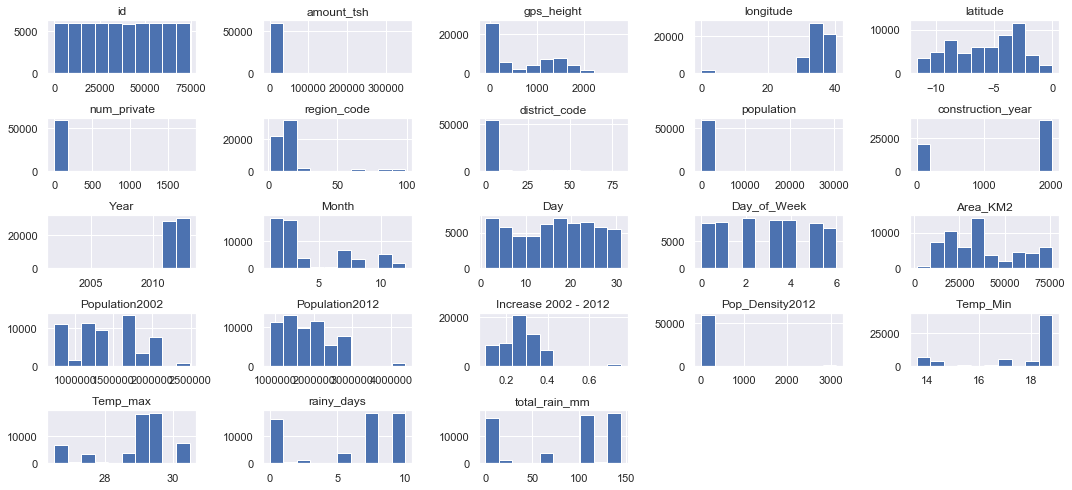

In [17]:
hf.draw_histograms(combined_df, nums, n_rows = 6, n_cols = 5)
scaled_numerics = nums.drop('id')

## Imputing Blanks

In [18]:
#Impute for construction year
combined_df.loc[combined_df['construction_year'] == 0, 'construction_year'] = combined_df['construction_year'].mean()

In [ ]:
#Compute population, long and lats averages in districts within regions
combined_df = hf.group_mean(combined_df, group_vars = ['region', 'district_code'], 
                            target_vars = ['population', 'latitude', 'longitude'])

In [ ]:
#Determine which categorical variables to keep or drop based on number of unique values
up = 20
low = 2

reduced_cat, large_drop, small_drop = hf.drop_categorical(combined_df, cat, upper_bound = up, 
                                                          lower_bound = low)

The following categories have too many unique values: ['scheme_name', 'lga', 'funder', 'region', 'subvillage', 'date_recorded', 'ward', 'installer', 'wpt_name', 'Name']
The following categories have too few unique values: ['Status', 'recorded_by']


In [ ]:
total_cat = reduced_cat.copy()
# for var in large_drop:
#     combined_df = hf.set_empty(combined_df, var)
#     total_cat.append(combined_df.columns[len(combined_df.columns)-1])

In [ ]:
#Scale the status variable
categorical_df = hf.categorical_to_scale(combined_df, 'status_group')
categorical_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Temp_Min,Temp_max,rainy_days,total_rain_mm,func_band
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,35503,840404,941238,0.119983,26.511506,18.3,29.0,7,113.9,2
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,21760,1363397,1743830,0.279033,80.139246,18.3,29.0,7,113.9,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,44522,1037605,1425131,0.373481,32.009591,18.6,29.4,9,144.5,2
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,16710,1124481,1270854,0.130169,76.053501,18.6,29.4,10,133.7,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,25265,1791451,2458023,0.372085,97.289650,13.6,26.5,0,0.0,2


## Categorical Reduction

In [ ]:
target = 'func_band'
# for var in total_cat:
#     hf.cat_stacked_bar(categorical_df, target ,var)

In [ ]:
#Removing based on analysis of similar categoricals
bool_to_drop = ['status_group', 'payment', 'quality_group', 'quantity_group', 'source_type', 
                'extraction_type_group', 'waterpoint_type_group']
reduced_cat = [var for var in reduced_cat if var not in bool_to_drop]

#Removed amount_tsh as majority of values are empty and num_private has no inherent meaning
nums_to_drop = ['id', 'amount_tsh', 'num_private']
scaled_numerics = [var for var in scaled_numerics if var not in nums_to_drop]

vars_to_drop = bool_to_drop + nums_to_drop
categorical_df = categorical_df.drop(vars_to_drop, axis = 1)

In [ ]:
#Deal with LGA (rename all entries containing Rural and Urban)
categorical_df.loc[categorical_df['lga'].str.contains(' Rural'),'lga'] = 'rural'
categorical_df.loc[categorical_df['lga'].str.contains(' Urban'),'lga'] = 'urban'

#Otherwise rename as other
searchfor = ['rural', 'urban']
categorical_df.loc[~categorical_df['lga'].str.contains('|'.join(searchfor)),'lga'] = 'other'

reduced_cat.append('lga')
large_drop.remove('lga')

In [ ]:
#Deal with extraction type
consolidate = ['cemo','climax', 'other - mkulima/shinyanga', 'other - play pump', 'walimi',
              'other - swn 81','swn 80','india mark ii','india mark iii']

categorical_df.loc[categorical_df['extraction_type'].str.contains('|'.join(consolidate)),
                  'extraction_type'] = 'other motorpump'

In [ ]:
#Deal with funder and installer
for var in reduced_cat:
    categorical_df = hf.group_underrepresented_cat(categorical_df, var, tol = 0.02)
    
grouped_cat = ['funder', 'installer']
for var in grouped_cat:
    categorical_df = hf.group_underrepresented_cat(categorical_df, var, tol = 0.02)
    
    reduced_cat.append(var)
    large_drop.remove(var)

In [ ]:
#Create dummy variables for categorical variables
encoded_df = hf.onehot_encode(categorical_df, reduced_cat)
encoded_df = encoded_df.drop(large_drop, axis = 1)
encoded_df = encoded_df.drop(small_drop, axis = 1)

#Keep track of boolean variables after encoding
booleans = hf.boolean_features(encoded_df)
encoded_df.head()

,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Year,Month,Day,...,funder_Kkkt,funder_Rwssp,funder_World Bank,funder_World Vision,funder_other,installer_,installer_DWE,installer_Government,installer_RWE,installer_other
0,1390,34.938093,-9.856322,11,5,109.0,1999.000000,2011,3,14,...,0,0,0,0,1,0,0,0,0,1
1,1399,34.698766,-2.147466,20,2,280.0,2010.000000,2013,3,6,...,0,0,0,0,1,0,0,0,0,1
2,686,37.460664,-3.821329,21,4,250.0,2009.000000,2013,2,25,...,0,0,0,0,1,0,0,0,0,1
3,263,38.486161,-11.155298,90,63,58.0,1986.000000,2013,1,28,...,0,0,0,0,1,0,0,0,0,1
4,0,31.130847,-1.825359,18,1,0.0,1300.652475,2011,7,13,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#Fix skewness and standardized numeric variables
prepared = encoded_df.copy()
prepared[scaled_numerics] = hf.fix_skewness(prepared[scaled_numerics])
prepared = hf.standardize(prepared, scaled_numerics)
prepared.head()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Helper_Function.py:215: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  standardized_numericals = preprocessing.scale(df[numerical_values])
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


,gps_height,longitude,latitude,region_code,district_code,population,construction_year,Year,Month,Day,...,funder_Kkkt,funder_Rwssp,funder_World Bank,funder_World Vision,funder_other,installer_,installer_DWE,installer_Government,installer_RWE,installer_other
0,1.041252,0.114456,-1.408791,0.078267,0.659372,0.443962,0.737849,-0.961322,-0.186426,-0.186648,...,0,0,0,0,1,0,0,0,0,1
1,1.054237,0.071931,1.207934,0.749225,-0.512172,0.967105,0.770992,1.124729,-0.186426,-1.107513,...,0,0,0,0,1,0,0,0,0,1
2,0.025541,0.562679,0.639751,0.804053,0.397653,0.898184,0.767979,1.124729,-0.794850,1.079542,...,0,0,0,0,1,0,0,0,0,1
3,-0.584751,0.744894,-1.849720,2.410081,2.355412,0.152299,0.698681,1.124729,-1.774480,1.424867,...,0,0,0,0,1,0,0,0,0,1
4,-0.964200,-0.562035,1.317271,0.630778,-1.466710,-1.016330,-1.366236,-0.961322,1.031636,-0.301756,...,0,0,0,0,1,0,0,0,0,1


## Train and Test Baseline

In [ ]:
# Set test set size, seed and target metric for the rest of the pipeline
size = 0.20
seed = 12345
target_metric = 'accuracy'

features = list(prepared)
features.remove(target)

dependent_var = [target]
X_baseline = prepared.loc[:, features]
y = prepared.loc[:, dependent_var]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=size, random_state=seed)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


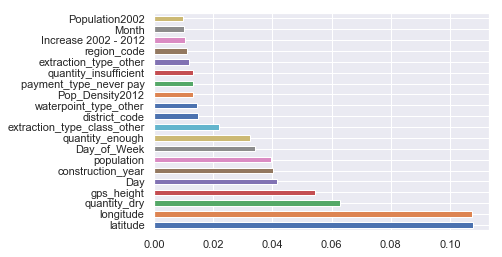

In [ ]:
# fit baseline model
first_baseline = RandomForestClassifier(random_state = seed, max_features = 'auto')
first_baseline = first_baseline.fit(X_train,y_train)

y_pred = first_baseline.predict(X_test) 

(pd.Series(first_baseline.feature_importances_, index=X_baseline.columns)
   .nlargest(20)
   .plot(kind='barh')) 

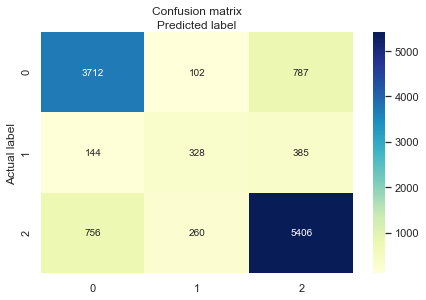

In [ ]:
hf.confusion_heat_map(y_test, y_pred)

In [ ]:
print('BASE LINE:')
print('Accuracy of Random Forest classifier on hold-out set: {:.3f}'.format(first_baseline.score(X_test, 
                                                                                                 y_test)))
accuracy = hf.cv_evaluate(prepared, target, seed, cv = 5)
print('Mean Accuracy after CV: {:.3f} +/- {:.03f}'.format(np.mean(accuracy), np.std(accuracy)))
print('Best Accuracy after CV: {:.3f}'.format(max(accuracy)))
print()
print(classification_report(y_test, y_pred))

BASE LINE:
Accuracy of Random Forest classifier on hold-out set: 0.795
Mean Accuracy after CV: 0.790 +/- 0.003
Best Accuracy after CV: 0.793

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4601
           1       0.48      0.38      0.42       857
           2       0.82      0.84      0.83      6422

   micro avg       0.80      0.80      0.80     11880
   macro avg       0.70      0.68      0.69     11880
weighted avg       0.79      0.80      0.79     11880



## Custom Feature Engineering

### Feature 1: Operation Years

In [ ]:
operation_years_df = encoded_df.copy()
operation_years_df = hf.operation_years(operation_years_df)

#Don't do this as it creates infinit values for operation_year
# scaled_numerics_ops = scaled_numerics.copy()
# scaled_numerics_ops.append('operation_year')

operation_years_df[scaled_numerics] = hf.fix_skewness(operation_years_df[scaled_numerics])
operation_years_df = hf.standardize(operation_years_df, scaled_numerics)

features_op = list(operation_years_df)
features_op.remove(target)
X_operation_years = operation_years_df.loc[:, features_op]

X_train_op, X_test_op, y_train, y_test = train_test_split(X_operation_years, y, test_size=size, 
                                                          random_state=seed)

baseline = RandomForestClassifier(random_state = seed, max_features = 'auto')
baseline = baseline.fit(X_train_op,y_train.values.ravel())

print('Accuracy of Operation_Years: {:.3f}'.format(baseline.score(X_test_op, y_test.values.ravel())))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


### Feature 2: Genetic Programming

In [ ]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min', 'sin', 
                'cos', 'tan']

gp_df = encoded_df.copy()
gp_df, gp_transformer = hf.gp_features(gp_df, target, random_state = seed, generations = 10, 
                                       function_set = function_set)

features_gp = list(gp_df)
features_gp.remove(target)
X_gp = gp_df.loc[:, features_gp]

gp_numericals = hf.numerical_features(X_gp)
X_gp = hf.standardize(X_gp, gp_numericals)
#Doesn't work because of negative values
#X_gp[gp_numericals] = hf.fix_skewness(X_gp[gp_numericals])

#Create New Training Split
X_train_gp, X_test_gp, y_train, y_test = train_test_split(X_gp, y, test_size=size, random_state=seed)

baseline = RandomForestClassifier(random_state = seed, max_features = 'auto')
baseline = baseline.fit(X_train_gp, y_train.values.ravel())

print('Accuracy of Genetic Programming: {:.3f}'.format(baseline.score(X_test_gp, y_test.values.ravel())))

### Feature 3: Polynomial Features

In [ ]:
pol_df = encoded_df.copy()
pol = PolynomialFeatures(2)

pol_features = pol.fit_transform(pol_df[scaled_numerics])
pol_features = pd.DataFrame(hf.standardize2(pol_features))

print('{} features were created.'.format(pol.n_output_features_))

In [ ]:
X_poly = pol_features.join(encoded_df[features])

#Create New Training Split
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=size, random_state=seed)

baseline = RandomForestClassifier(random_state = seed, max_features = 'auto')
baseline = baseline.fit(X_train_poly,y_train.values.ravel())

print('Accuracy of Polynomial Features: {:.3f}'.format(baseline.score(X_test_poly, y_test.values.ravel())))

## Combine Helpful Features

In [ ]:
X_eng = X_gp.join(pol_features)
# X_eng = X_gp
X_eng['operation_year'] = X_operation_years['operation_year']

non_bool_numerics = hf.numerical_features(X_eng)
X_train_eng, X_test_eng, y_train, y_test = train_test_split(X_eng, y, test_size=size, random_state=seed)

baseline = RandomForestClassifier(random_state = seed, max_features = 'auto')
baseline = baseline.fit(X_train_eng,y_train)

print('Accuracy of Aggregate Feature Engineering: {:.3f}'.format(baseline.score(X_test_eng, 
                                                                y_test.values.ravel())))

## Principal Component Analysis

In [ ]:
#Create PCA object for 10 components
pca = PCA(n_components = 10, random_state = seed)
pca.fit(X_eng[non_bool_numerics])

#Apply PCA to X train set
X_pca_train = pd.DataFrame(pca.fit_transform(X_train_eng[non_bool_numerics]))

#Apply PCA to X test set
X_pca_test = pd.DataFrame(pca.fit_transform(X_test_eng[non_bool_numerics]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# #Analyze different PCA combinations
# PCA_train = X_pca_train.join(y_train)
# PCA_num = 10
# for x in range(0,PCA_num):
#     for y in range(1,PCA_num):
#         if x != y:
#             hf.pca_analysis(PCA_train, target, pca_1 = x, pca_2 = y, labels=[0,1,2], 
#             labl={0:'Non-Functional',1:'Repair',2:'Functional'})


## Boolean Feature Reduction

In [ ]:
level_bools = hf.boolean_features(X_train)

X_bool = X_eng.loc[:,level_bools].copy()
X_train_bool = X_train.loc[:,level_bools].copy()
X_test_bool = X_test.loc[:,level_bools].copy()
                             
X_optimized_bool, optimized_model = hf.feature_reduction(baseline,score_target = target_metric, 
                                                         cv_input = 5, X_entire_set = X_bool, 
                                                         X_train_set= X_train_bool,y_train_set = y_train)

In [ ]:
#Combine PCA variables with boolean for first level training
X_train_bool = X_train_bool.loc[:,X_optimized_bool.columns]
X_test_bool = X_test_bool.loc[:,X_optimized_bool.columns]

X_stack_train = pd.concat([X_train_bool.reset_index(drop=True), X_pca_train], axis=1)
X_stack_test = pd.concat([X_test_bool.reset_index(drop=True), X_pca_test], axis=1)

X_stack_train.head()

In [ ]:
baseline = RandomForestClassifier(random_state = seed, max_features = 'auto')
baseline = baseline.fit(X_stack_train,y_train.values.ravel())

print('Accuracy of Feature Reduction: {:.3f}'.format(baseline.score(X_stack_test, y_test.values.ravel())))

## Identifying Functional Wells

In [ ]:
y_functional_train = pd.DataFrame([1 if value == 2 else 0 for value in y_train.iloc[:,0]])
y_functional_train.columns = ['functional']

y_functional_train.head()

### Stack Models

In [ ]:
#Select models for ensembles and parameters to tune
model_1 = GradientBoostingClassifier(random_state = seed, max_features = 'auto')
model_2 = RandomForestClassifier(random_state = seed, max_features = 'auto')
model_3 = KNeighborsClassifier()

param_model_1 = {'n_estimators':range(100,200,50), 'max_depth':range(2,5,1)}
param_model_2 = {'n_estimators':range(100,200,50), 'max_depth':range(2,5,1)}
param_model_3 = {'n_neighbors':range(3, 7, 1)}

In [ ]:
#Tune First Model
tuned_func_model_1 = hf.tune_model(model_1, param_model_1, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_functional_train, verbose = True)

In [ ]:
#Tune Second Model
tuned_func_model_2 = hf.tune_model(model_2, param_model_2, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_functional_train, verbose = True)

In [ ]:
#Tune Third Model
tuned_func_model_3 = hf.tune_model(model_3, param_model_3, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_functional_train, verbose = True)

In [ ]:
models_fun = [('gb', tuned_func_model_1), ('rf', tuned_func_model_2), ('knn', tuned_func_model_3)]

stack_fun = StackingTransformer(estimators=models_fun, regression=False, needs_proba = True, 
                                stratified = True, n_folds=5, shuffle=True, random_state=seed, verbose = 2) 

stack_fun = stack_fun.fit(X_stack_train, y_functional_train)

In [ ]:
S_train_fun = pd.DataFrame(stack_fun.transform(X_stack_train))
S_test_fun = pd.DataFrame(stack_fun.transform(X_stack_test))

## Identifying Non-Functional Wells

In [ ]:
y_nonfunctional_train = pd.DataFrame([1 if value == 0 else 0 for value in y_train.iloc[:,0]])
y_nonfunctional_train.columns = ['nonfunctional']

y_nonfunctional_train.head()

### Stack Models

In [ ]:
#Tune First Model
tuned_non_func_model_1 = hf.tune_model(model_1, param_model_1, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_nonfunctional_train, verbose = True)

In [ ]:
#Tune Second Model
tuned_non_func_model_2 = hf.tune_model(model_2, param_model_2, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_nonfunctional_train, verbose = True)

In [ ]:
#Tune Third Model
tuned_non_func_model_3 = hf.tune_model(model_3, param_model_3, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_nonfunctional_train, verbose = True)

In [ ]:
models_non = [('gb', tuned_non_func_model_1), ('rf', tuned_non_func_model_2), ('knn', tuned_non_func_model_3)]

stack_non = StackingTransformer(estimators=models_non, regression=False, needs_proba = True,
                                stratified = True, n_folds=5, shuffle=True, random_state=seed, verbose = 2) 

stack_non = stack_non.fit(X_stack_train, y_nonfunctional_train)

In [ ]:
S_train_non = pd.DataFrame(stack_non.transform(X_stack_train))
S_test_non = pd.DataFrame(stack_non.transform(X_stack_test))

## Identifying Functional with Repair

In [ ]:
y_repair_train = pd.DataFrame([1 if value == 1 else 0 for value in y_train.iloc[:,0]])
y_repair_train.columns = ['repair']

y_repair_train.head()

### Stack Models

In [ ]:
#Tune First Model
tuned_repair_model_1 = hf.tune_model(model_1, param_model_1, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_repair_train, verbose = True)

In [ ]:
#Tune Second Model
tuned_repair_model_2 = hf.tune_model(model_2, param_model_2, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_repair_train, verbose = True)

In [ ]:
#Tune Third Model
tuned_repair_model_3 = hf.tune_model(model_3, param_model_3, n_jobs = 4, X_train = X_stack_train, 
                                   y_train = y_repair_train, verbose = True)

In [ ]:
models_repair = [('gb', tuned_repair_model_1), ('rf', tuned_repair_model_2), ('knn', tuned_repair_model_3)]

stack_repair = StackingTransformer(estimators=models_repair, regression=False, needs_proba = True,
                                   stratified = True, n_folds=5, shuffle=True, random_state=seed, 
                                   verbose = 2) 

stack_repair = stack_repair.fit(X_stack_train, y_repair_train)

In [ ]:
S_train_repair = pd.DataFrame(stack_repair.transform(X_stack_train))
S_test_repair = pd.DataFrame(stack_repair.transform(X_stack_test))

## Combine in Final Model Layer

In [ ]:
meta_1 = RandomForestClassifier(random_state = seed, max_features = 'auto')

col_length = len(S_train_non.columns)
S_train_non.columns, S_test_non.columns = range(col_length,col_length*2,1), range(col_length,col_length*2,1)
S_train_repair.columns, S_test_repair.columns = range(col_length*2,col_length*3,1), range(col_length*2,col_length*3,1)

S_train_full = S_train_fun.join([S_train_non,S_train_repair])
S_test_full = S_test_fun.join([S_test_non,S_test_repair])
    
meta_1 = meta_1.fit(S_train_full, y_train)
y_pred = meta_1.predict(S_test_full)

hf.confusion_heat_map(y_test, y_pred)

In [ ]:
S_full = S_train_full.append(S_test_full)
y_full = y_train.append(y_test)

print('Accuracy of Stacked classifier on hold-out set: {:.3f}'.format(meta_1.score(S_test_full, y_test)))
accuracy = cross_val_score(meta_1, S_full, y_full.values.ravel(), scoring='accuracy', cv=5) 
print('Mean Accuracy after CV: {:.3f} +/- {:.03f}'.format(np.mean(accuracy), np.std(accuracy)))
print('Best Accuracy after CV: {:.3f}'.format(max(accuracy)))
print(classification_report(y_test, y_pred))

In [ ]:
#Tune Hyperparameters
param_test_final = {'max_depth': range(2,5,1), 'n_estimators': range(100, 300, 50)}

final_model = hf.tune_model(meta_1, param_test_final, n_jobs = 4, X_train = S_train_full, 
                                   y_train = y_train, verbose = True)

In [ ]:
y_pred = final_model.predict(S_test_full)
hf.confusion_heat_map(y_test, y_pred)

In [ ]:
print('Accuracy of Tuned Stacked Classifier on hold-out set: {:.3f}'.format(final_model.score(S_test_full, y_test)))
accuracy = cross_val_score(final_model, S_full, y_full.values.ravel(), scoring='accuracy', cv=5) 
print('Mean Accuracy after CV: {:.3f} +/- {:.03f}'.format(np.mean(accuracy), np.std(accuracy)))
print('Best Accuracy after CV: {:.3f}'.format(max(accuracy)))
print(classification_report(y_test, y_pred))

## Test Data Processing and Modeling

In [ ]:
#Parse date 
raw_test_df['date_recorded'] = pd.to_datetime(raw_test_df['date_recorded'])
raw_test_df['Year'], raw_test_df['Month'], raw_test_df['Day'], raw_test_df['Day_of_Week'] = raw_test_df['date_recorded'].dt.year, raw_test_df['date_recorded'].dt.month,raw_test_df['date_recorded'].dt.day,raw_test_df['date_recorded'].dt.weekday
raw_test_df.head()

In [ ]:
#Merge with population data set
combined_test_df = pd.merge(raw_test_df, pop_df, how = 'left', left_on = 'region', 
                            right_on = 'Name')
combined_test_df.head()

In [ ]:
#Merge with weather data set
combined_test_df = pd.merge(combined_test_df, weather_df, how = 'left', left_on = 'Month', 
                       right_on = 'Month_num')

combined_test_df = combined_test_df.drop('Month_num', axis = 1)
combined_test_df.head()

### Imputing Blanks

In [ ]:
#Impute for construction year
combined_test_df.loc[combined_test_df['construction_year'] == 0, 'construction_year'] = combined_test_df['construction_year'].mean()

In [ ]:
#Compute averages in districts within regions
combined_test_df = hf.group_mean(combined_test_df, group_vars = ['region', 'district_code'], 
                            target_vars = ['population', 'latitude', 'longitude'])

### Reducing Categories

In [ ]:
#Determine which categorical variables to keep or drop based on number of unique values
cat.remove('status_group')
reduced_cat, large_drop, small_drop = hf.drop_categorical(combined_test_df, cat, upper_bound = up, 
                                                          lower_bound = low)

In [ ]:
#Drop variables based on exploratory analysis
vars_to_drop.remove('status_group')
reduced_cat = [var for var in reduced_cat if var not in bool_to_drop]
scaled_numerics = [var for var in scaled_numerics if var not in nums_to_drop]

combined_test_df = combined_test_df.drop(vars_to_drop, axis = 1)

In [ ]:
#Deal with LGA (rename all entries containing Rural and Urban)
combined_test_df.loc[combined_test_df['lga'].str.contains(' Rural'),'lga'] = 'rural'
combined_test_df.loc[combined_test_df['lga'].str.contains(' Urban'),'lga'] = 'urban'

#Otherwise rename as other
searchfor = ['rural', 'urban']
combined_test_df.loc[~combined_test_df['lga'].str.contains('|'.join(searchfor)),'lga'] = 'other'

reduced_cat.append('lga')
large_drop.remove('lga')

In [ ]:
#Deal with extraction type
combined_test_df.loc[combined_test_df['extraction_type'].str.contains('|'.join(consolidate)),
                  'extraction_type'] = 'other motorpump'

In [ ]:
#Deal with funder and installer
for var in reduced_cat:
    combined_test_df = hf.group_underrepresented_cat(combined_test_df, var, tol = 0.01)
    
for var in grouped_cat:
    combined_test_df = hf.group_underrepresented_cat(combined_test_df, var, tol = 0.01)
    
    reduced_cat.append(var)
    large_drop.remove(var)

### Feature Reduction and Ensure data structure matches train set

In [ ]:
#Create dummy variables for categorical variables
encoded_test_df = hf.onehot_encode(combined_test_df, reduced_cat)
encoded_test_df = encoded_test_df.drop(large_drop, axis = 1)
encoded_test_df = encoded_test_df.drop(small_drop, axis = 1)

encoded_test_df.head()

In [ ]:
#Ensure test set columns match what model was trained with
X_baseline_test = hf.column_sync(encoded_test_df, X_test_col = encoded_test_df.columns, 
                              X_train_col = X_baseline.columns)
        
X_baseline_test.head()

In [ ]:
# ################################ Uncomment to debug #################################
# #####################################################################################
# #####################################################################################

# train_col = X_baseline.columns.sort_values()
# final_col = X_baseline_test.columns.sort_values()
# for x in range(0,len(final_col)):
#     print(train_col[x], final_col[x], train_col[x] == final_col[x])
    
#     if train_col[x] != final_col[x]:
#         print(train_col[x], final_col[x])

### Output Baseline CSV

In [ ]:
#Create CSV based on prediction from baseline model
X_baseline_final_test = pd.DataFrame(hf.standardize2(X_baseline_test))
y_baseline_test_pred = pd.DataFrame(first_baseline.predict(X_baseline_final_test))
y_baseline_test_pred.columns = [target]

baseline_clean_output = hf.csv_conversion(raw_test_df,y_baseline_test_pred,old_target_name = target,
                        new_target_name = 'status_group',target_cat = ['non functional', 
                        'functional needs repair', 'functional'], unqiue_override=[0,1,2], 
                        file_name = 'O-1-6_Submission_BASELINE.csv')

baseline_clean_output.to_csv("O-1-6_Submission_BASELINE.csv", index=False)
baseline_clean_output.head()

## Feature Engineering

In [ ]:
#Operation Years
########################################################################################
########################################################################################
op_test_df = encoded_test_df.copy()
op_test_df = hf.operation_years(encoded_test_df)
op_numericals = hf.numerical_features(op_test_df)
op_test_df = hf.standardize(op_test_df, op_numericals)


#Genetic Programming
########################################################################################
########################################################################################
gp_test_df = encoded_test_df.copy()

gp_train_df = encoded_df.copy()
gp_train_df = pd.DataFrame(gp_train_df.drop(target, axis = 1))

#Ensure that the input data columns match training columns
gp_test_df = hf.column_sync(gp_test_df, X_test_col = gp_test_df.columns, X_train_col = gp_train_df.columns)
gp_test_df = gp_test_df.loc[:,gp_train_df.columns]

gp_test_df = pd.DataFrame(gp_transformer(gp_test_df))
gp_numericals = hf.numerical_features(gp_test_df)
gp_test_df = hf.standardize(gp_test_df, gp_numericals)


#Polynomial Features
########################################################################################
########################################################################################
pol_test_df = encoded_test_df.copy()
pol_test_features = pol.fit_transform(pol_test_df[scaled_numerics])
pol_test_features = pd.DataFrame(hf.standardize2(pol_test_features))


#Combine Useful Features
########################################################################################
########################################################################################
#test_features = gp_test_df.join(pol_test_features)
test_features = gp_test_df
test_features['operation_year'] = op_test_df['operation_year']

### Feature Reduction and Ensure data structure matches train set

In [ ]:
#Apply PCA to X train set and join with Y train set
X_pca_final = test_features.copy()
X_pca_final = pd.DataFrame(pca.fit_transform(X_pca_final))

#Combine PCA variables with boolean for first level training
X_final_bool = encoded_test_df.copy()
                             
X_final = X_final_bool.join(X_pca_final)
X_final.head()

In [ ]:
#Ensure test set columns match what model was trained with
X_final_test = hf.column_sync(X_final, X_test_col = X_final.columns, X_train_col = X_stack_train.columns)
        
#Final check to remove extraneous columns 
X_final_test = X_final_test.loc[:,X_stack_train.columns]
X_final_test.head()

In [ ]:
# ################################ Uncomment to debug #################################
# #####################################################################################
# #####################################################################################

# train_col = X_stack_train.columns
# final_col = X_final_test.columns

# for x in range(0,len(final_col)):
#     print(x, train_col[x], final_col[x], train_col[x] == final_col[x])
    
# #     if train_col[x] != final_col[x]:
# #         print(train_col[x], final_col[x])

In [ ]:
#Transform data based on trained stacked models
S_test_func_final = pd.DataFrame(stack_fun.transform(X_final_test))
S_test_nonfunc_final = pd.DataFrame(stack_non.transform(X_final_test))
S_test_repair_final = pd.DataFrame(stack_repair.transform(X_final_test))

### Output Final Model CSV

In [ ]:
#Create CSV based on prediction from final model
S_test_nonfunc_final.columns = range(col_length,col_length*2,1)
S_test_repair_final.columns = range(col_length*2,col_length*3,1)

S_test_final = S_test_func_final.join([S_test_nonfunc_final, S_test_repair_final])

y_final_test_pred = pd.DataFrame(final_model.predict(S_test_final))
y_final_test_pred.columns = [target]

final_clean_output = hf.csv_conversion(raw_test_df,y_final_test_pred,old_target_name = target,
                        new_target_name = 'status_group',target_cat = ['non functional', 
                        'functional needs repair', 'functional'], unqiue_override=[0,1,2], 
                        file_name = 'O-1-6_Submission_FINAL.csv')

final_clean_output.to_csv("O-1-6_Submission_FINAL.csv", index=False)
final_clean_output.head()

In [ ]:
######################## Hide code in final report output ########################
##################################################################################
##################################################################################

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [ ]:
final_clean_output